<a href="https://colab.research.google.com/github/johnwesly08/match_prediction_ml_model/blob/main/The_Rebels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:


data = pd.read_csv("/datasetnew.csv")



In [ ]:

print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   team_no    batting_team      bowling_team       city  runs_left  \
0        0  Gujarat Titans  Rajasthan Royals  Ahmedabad        131   
1        1  Gujarat Titans  Rajasthan Royals  Ahmedabad        131   
2        2  Gujarat Titans  Rajasthan Royals  Ahmedabad        126   
3        3  Gujarat Titans  Rajasthan Royals  Ahmedabad        122   
4        4  Gujarat Titans  Rajasthan Royals  Ahmedabad        122   

   balls_left  wickets_remaining  total_run_x   crr   rrr  results  
0         125                 10          131   0.0  6.29        1  
1         124                 10          131   0.0  6.34        1  
2         119                 10          131  30.0  6.35        1  
3         118                 10          131  27.0  6.20        1  
4         117                 10          131  18.0  6.26        1  


In [ ]:
print("\nData types and non-null counts:")
print(data.info())


Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94236 entries, 0 to 94235
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   team_no            94236 non-null  int64  
 1   batting_team       94236 non-null  object 
 2   bowling_team       94236 non-null  object 
 3   city               94236 non-null  object 
 4   runs_left          94236 non-null  int64  
 5   balls_left         94236 non-null  int64  
 6   wickets_remaining  94236 non-null  int64  
 7   total_run_x        94236 non-null  int64  
 8   crr                94236 non-null  float64
 9   rrr                94236 non-null  float64
 10  results            94236 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 7.9+ MB
None


In [ ]:
print("\nSummary statistics for numerical columns:")
print(data.describe())


Summary statistics for numerical columns:
            team_no     runs_left    balls_left  wickets_remaining  \
count  94236.000000  94236.000000  94236.000000       94236.000000   
mean   47117.500000     91.163770     66.553111           7.421909   
std    27203.734321     48.727012     32.176742           2.149914   
min        0.000000      0.000000      4.000000           0.000000   
25%    23558.750000     53.000000     40.000000           6.000000   
50%    47117.500000     90.000000     67.000000           8.000000   
75%    70676.250000    127.000000     94.000000           9.000000   
max    94235.000000    258.000000    125.000000          10.000000   

        total_run_x          crr           rrr       results  
count  94236.000000  94236.00000  94236.000000  94236.000000  
mean     167.810051      9.65476      8.640577      0.428064  
std       29.432185      5.89898      4.395176      0.494801  
min       63.000000      0.00000      0.000000      0.000000  
25%      14

In [ ]:
print("\nMissing values:")
print(data.isnull().sum())



Missing values:
team_no              0
batting_team         0
bowling_team         0
city                 0
runs_left            0
balls_left           0
wickets_remaining    0
total_run_x          0
crr                  0
rrr                  0
results              0
dtype: int64


In [ ]:
print("\nValue counts for categorical columns:")
for column in data.select_dtypes(include=['object']):
    print(data[column].value_counts())


Value counts for categorical columns:
batting_team
Delhi Capitals                 12842
Kolkata Knight Riders          12626
Mumbai Indians                 11638
Royal Challengers Bangalore    11359
Sunrisers Hyderabad            11088
Rajasthan Royals               10542
Punjab Kings                   10289
Chennai Super Kings            10059
Gujarat Titans                  2058
Lucknow Super Giants            1735
Name: count, dtype: int64
bowling_team
Punjab Kings                   14401
Sunrisers Hyderabad            12637
Delhi Capitals                 12382
Chennai Super Kings            11660
Mumbai Indians                 11403
Royal Challengers Bangalore    10511
Rajasthan Royals                8990
Kolkata Knight Riders           8938
Lucknow Super Giants            1658
Gujarat Titans                  1656
Name: count, dtype: int64
city
Mumbai            16791
Kolkata            8638
Delhi              8372
Chennai            8275
Hyderabad          7076
Chandigarh        

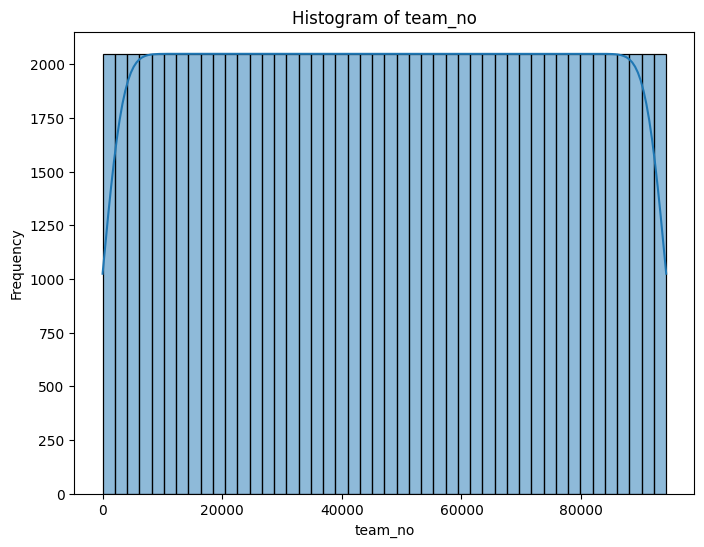

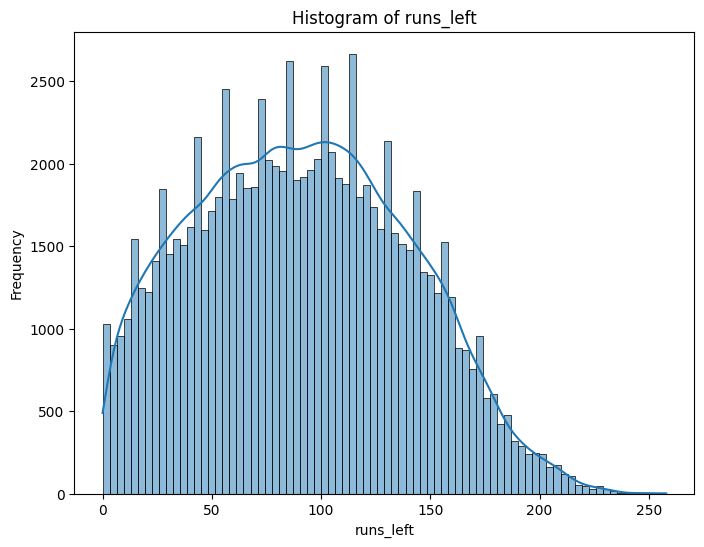

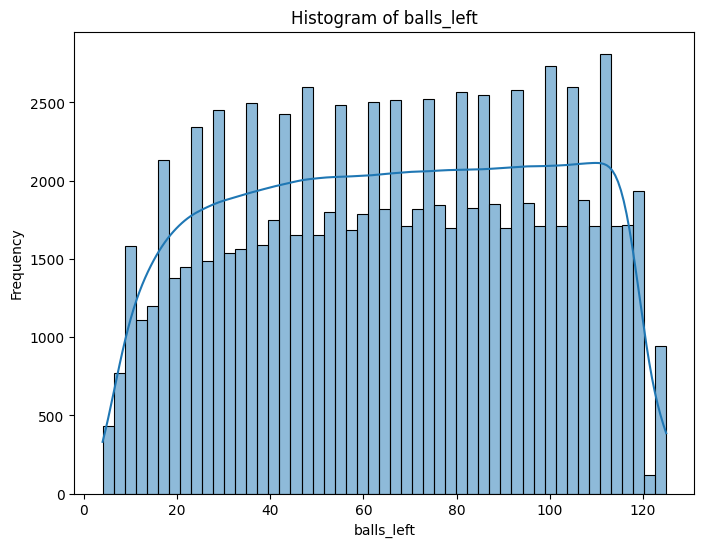

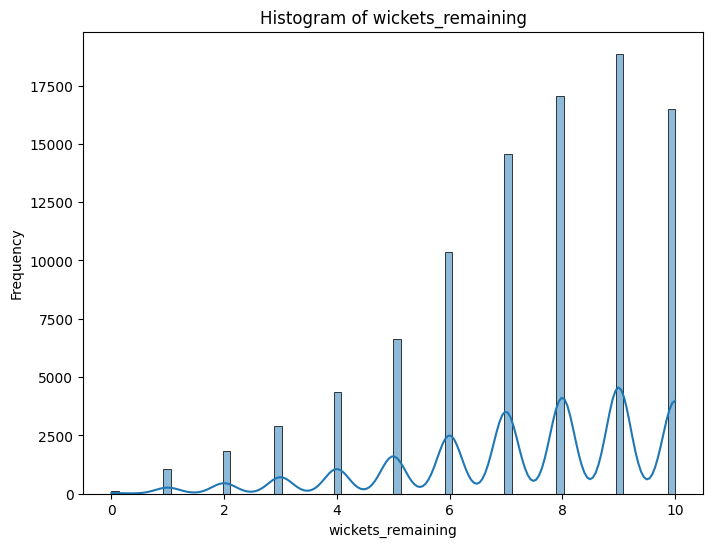

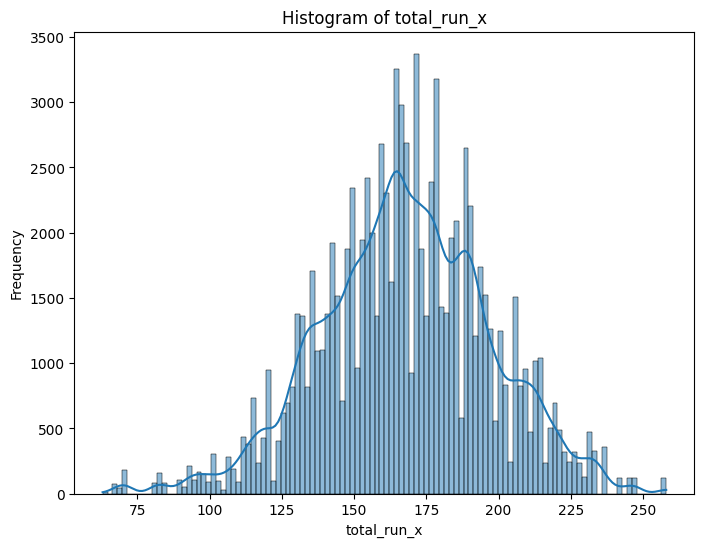

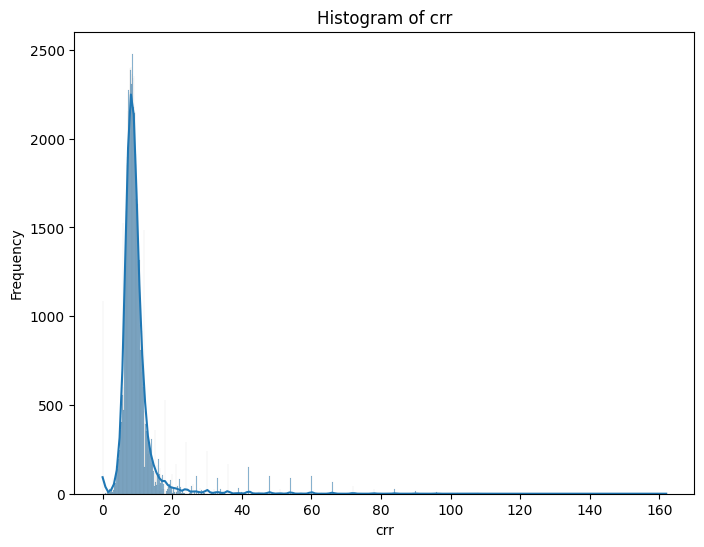

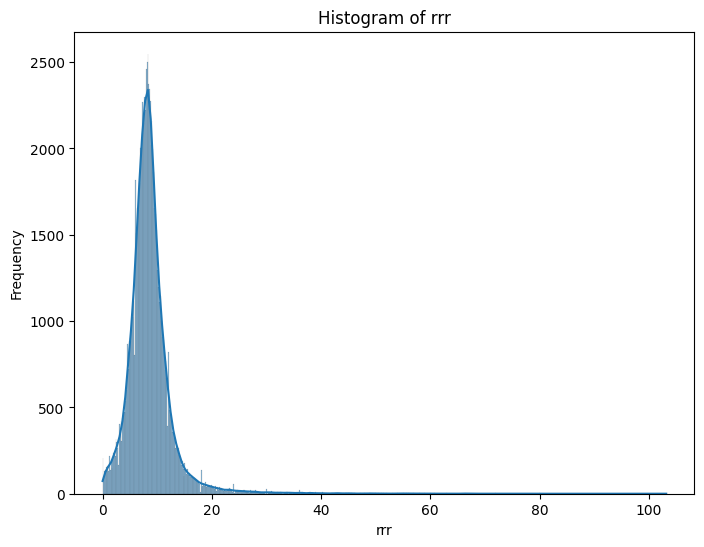

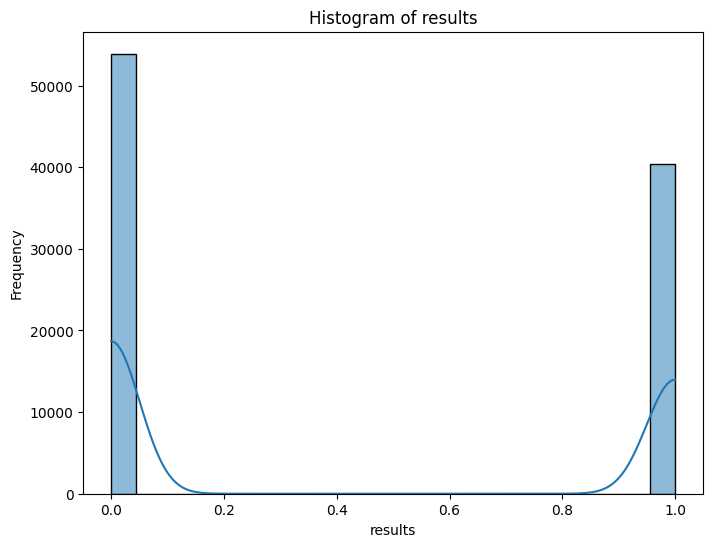

In [ ]:
for column in data.select_dtypes(exclude=['object']):
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column], kde=True)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()

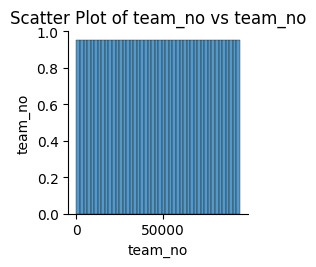

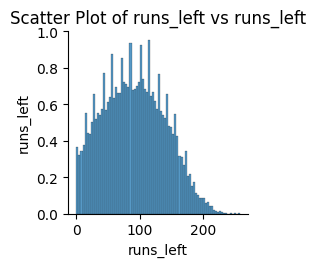

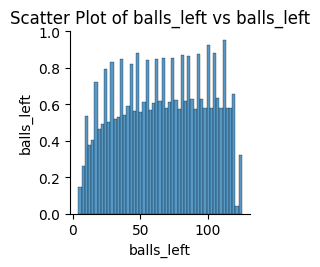

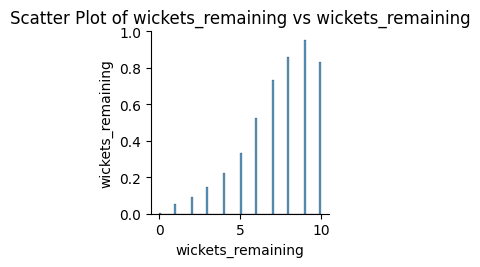

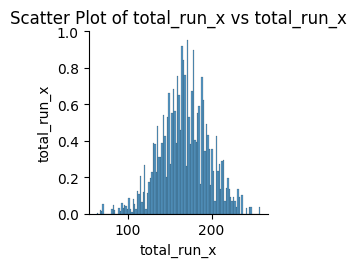

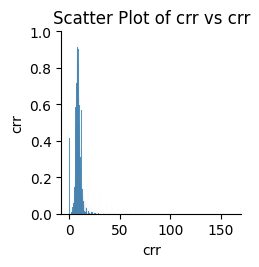

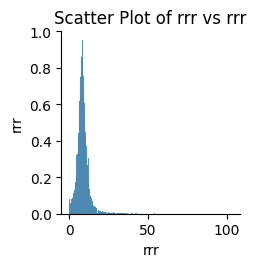

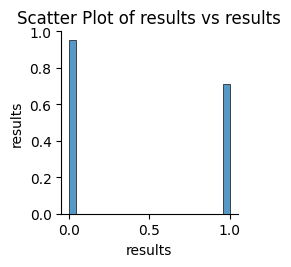

In [ ]:
for column in data.select_dtypes(exclude=['object']):
    sns.pairplot(data, x_vars=[column], y_vars=[column], kind='scatter')
    plt.xlabel(column)
    plt.ylabel(column)
    plt.title(f'Scatter Plot of {column} vs {column}')
    plt.show()


In [ ]:
correlation_matrix = data.corr()
print("\nCorrelation matrix:")
print(correlation_matrix)


ValueError: could not convert string to float: 'Gujarat Titans'

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:

csk_win_probability = 0.93


def generate_prediction_statement(team, probability):
    if probability >= 0.5:
        return f"I predict that {team} has a {probability*100:.2f}% chance to win the match."
    else:
        return f"I predict that {team} has a {(1-probability)*100:.2f}% chance to lose the match."


prediction_statement = generate_prediction_statement("CSK", csk_win_probability)

In [ ]:
for column in data.select_dtypes(exclude=['object']):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[column])
    plt.xlabel(column)
    plt.title(f'Box Plot of {column}')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder


In [ ]:
ipl_data = pd.read_csv("/dataset.csv")

# Drop any irrelevant columns (such as match_id)
# Assuming the last column is the target variable (result)
X = ipl_data.iloc[:, :-1]  # Features
y = ipl_data.iloc[:, -1]   # Target variable (win/loss or win probability)

In [ ]:
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
onehot_encoder = OneHotEncoder(sparse=False)
X_encoded = pd.DataFrame(onehot_encoder.fit_transform(X[categorical_columns]))
X_encoded.columns = onehot_encoder.get_feature_names_out(categorical_columns)  # Assign proper column names
X.drop(columns=categorical_columns, inplace=True)
X = pd.concat([X, X_encoded], axis=1)


In [ ]:
X.columns = X.columns.astype(str)
prediction =("csk has 93% chance to win the match")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.721615025466893


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.79      0.76     10741
           1       0.70      0.63      0.66      8107

    accuracy                           0.72     18848
   macro avg       0.72      0.71      0.71     18848
weighted avg       0.72      0.72      0.72     18848



In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("csk has 93% chance to win the match")

Confusion Matrix:
[[8512 2229]
 [3018 5089]]
csk has 93% chance to win the match


In [ ]:
print(prediction_statement)

I predict that CSK has a 93.00% chance to win the match.
